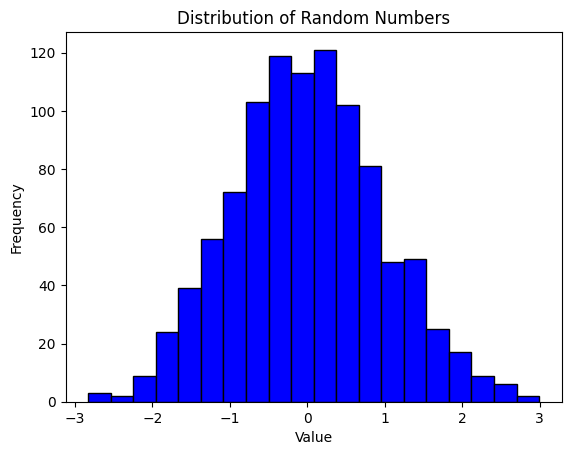

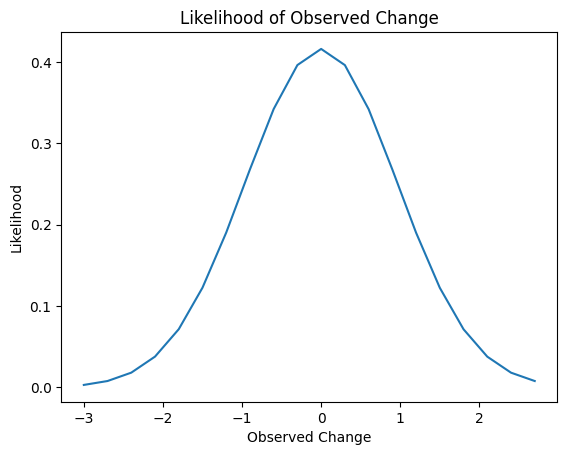

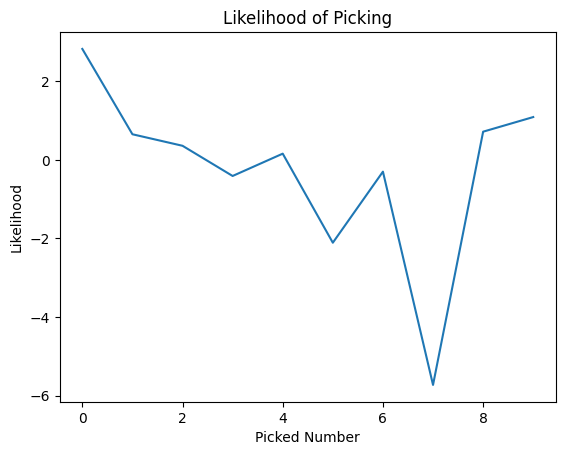

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter

import numpy as np
import scipy.stats as stats

def calculate_likelihood(percentage_changes, observed_change):
    mean_change = np.mean(percentage_changes)
    std_deviation = np.std(percentage_changes)

    # Create a normal distribution based on the mean and standard deviation
    normal_distribution = stats.norm(loc=mean_change, scale=std_deviation)

    # Calculate the CDF (cumulative distribution function) for the observed change
    likelihood = normal_distribution.pdf(observed_change)

    return likelihood

def calculate_likelihood_of_picking(number, percent_changes):
    total = sum(percent_changes)
    normalized_distribution = [change / total for change in percent_changes]
    return normalized_distribution[number]

def generate_and_display_distribution(num_samples):
    # Generate random numbers between 0.01 and 0.99
    random_numbers = [random.normalvariate() for _ in range(num_samples)]

    # Create a histogram to visualize the distribution
    plt.hist(random_numbers, bins=20, color='blue', edgecolor='black')
    plt.title('Distribution of Random Numbers')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()
    
    return random_numbers

num_samples = 1000
percent_changes = generate_and_display_distribution(num_samples)

calculations = [(change, calculate_likelihood(percent_changes, change)) for change in [(n / 10) * 3 for n in range(-10, 10)]]
picking = [(change, calculate_likelihood_of_picking(change, percent_changes)) for change in range(10)]
# picking = [(change, calculate_likelihood_of_picking(change, percent_changes)) for change in [(n / 10) * 3 for n in range(-10, 10)]]

plt.plot([x[0] for x in calculations], [x[1] for x in calculations])
plt.title('Likelihood of Observed Change')
plt.xlabel('Observed Change')
plt.ylabel('Likelihood')
plt.show()

plt.plot([x[0] for x in picking], [x[1] for x in picking])
plt.title('Likelihood of Picking')
plt.xlabel('Picked Number')
plt.ylabel('Likelihood')
plt.show()


Numbers: [1, 6, 8, 5, 7, 0, 3, 9, 5, 1]
Total: 100
Total Sum: 390
Normalized: [0.0026, 0.0154, 0.0205, 0.0128, 0.0179, 0.0, 0.0077, 0.0231, 0.0128, 0.0026]
Counts: Counter({5: 17, 3: 14, 0: 13, 1: 12, 6: 10, 2: 8, 4: 8, 7: 7, 9: 6, 8: 5})
Likelihoods: [(1, 0.12), (6, 0.1), (8, 0.05), (5, 0.17), (7, 0.07), (0, 0.13), (3, 0.14), (9, 0.06), (2, 0.08), (4, 0.08)]


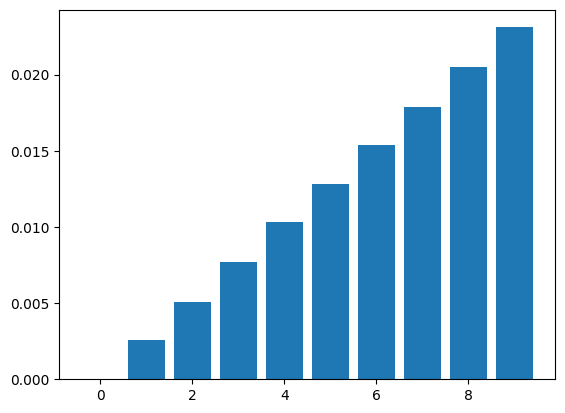

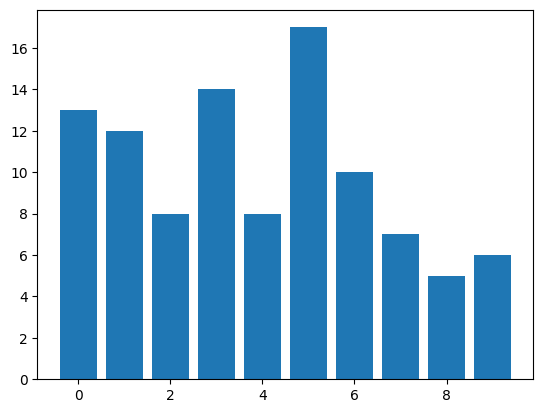

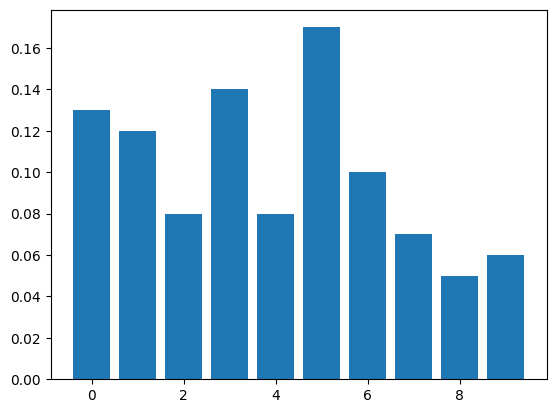

In [2]:
numbers = [random.randint(0, 9) for _ in range(100)]
total = len(numbers)
total_sum = sum(numbers)
normalized = [round(number / total_sum, 4) for number in numbers]
counts = Counter(numbers)
likelihoods = [(key, value / total) for key, value in counts.items()]
print(f"Numbers: {numbers[:10]}")
print(f"Total: {total}")
print(f"Total Sum: {total_sum}")
print(f"Normalized: {normalized[:10]}")
print(f"Counts: {counts}")
print(f"Likelihoods: {likelihoods}")
plt.bar(numbers, normalized)
plt.show()
plt.bar(counts.keys(), counts.values())
plt.show()
plt.bar([x[0] for x in likelihoods], [x[1] for x in likelihoods])
plt.show()

[3.3731, -0.8059, 4.8375, 0.1005, -1.5454, -4.5634, -2.0637, 1.918, 1.5779, -2.7165, -2.7703, -0.1428, 1.2717, 0.8179, 2.725, -4.4016, 3.5017, 3.3527, -0.5546, -1.5407, 1.5332, -4.2171, 1.0364, -2.3741, -3.3487, 3.3495, 2.6257, 2.4869, 3.0396, -1.4718, -4.6974, 3.8783, -2.3842, -4.5768, -2.3001, 1.0668, 0.5271, -3.1991, 3.9275, -0.5152, -0.27, 0.3418, 4.193, -4.7789, -3.2443, -3.6566, 0.0947, -4.2014, -0.8208, -3.6046, -0.6095, -3.5621, -3.9408, 2.2303, -4.67, -0.697, 4.8629, 0.2199, 4.4471, -0.0979, -1.0579, -2.7151, -0.3864, -3.0713, 4.2139, -3.5072, 1.7806, 1.3602, -1.0459, -0.1086, 3.7687, 0.0394, -3.7286, -0.15, -1.355, 1.3194, -1.2667, 2.7051, 2.0902, -1.3572, -2.9925, 2.1115, 0.4477, -0.2099, -3.9244, -4.2379, 4.3248, -4.2737, 0.3641, 0.6161, 3.2166, 1.6181, 0.8315, -4.0028, 2.4737, 2.5756, 2.8752, -1.6353, -0.6143, -4.9891, -3.0008, 1.4553, -1.5886, 1.7002, -3.7528, -2.5146, -0.5489, 0.1891, -3.9656, 0.7846, -4.6836, 0.4963, 0.9867, 0.5563, 3.6235, -2.1084, 3.0952, -2.2414, -0.

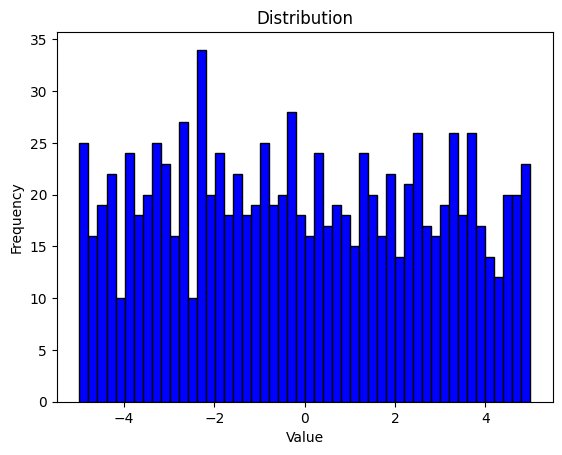

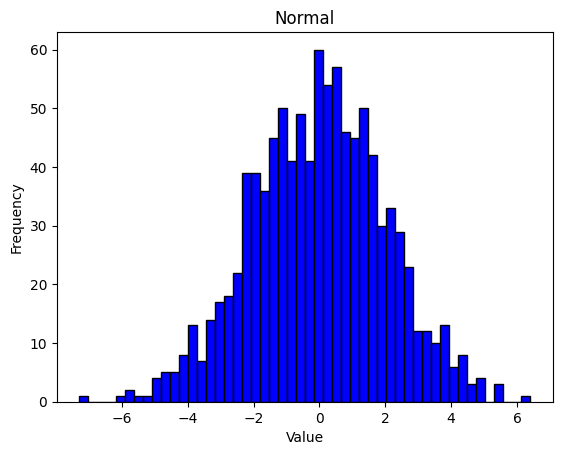

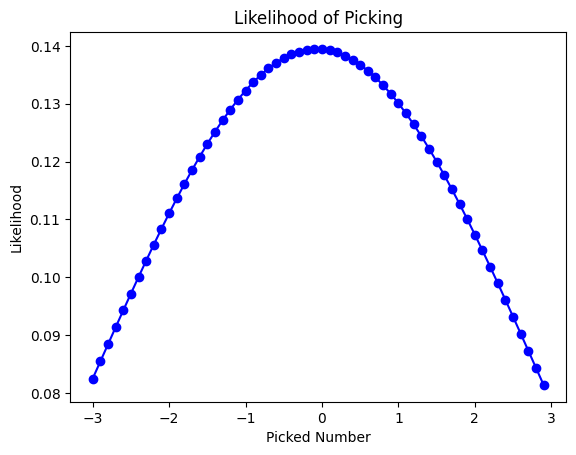

In [12]:
def calculate_likelihood(percentage_changes, observed_change):
    mean_change = np.mean(percentage_changes)
    std_deviation = np.std(percentage_changes)

    # Create a normal distribution based on the mean and standard deviation
    normal_distribution = stats.norm(loc=mean_change, scale=std_deviation)

    # Calculate the CDF (cumulative distribution function) for the observed change
    likelihood = normal_distribution.pdf(observed_change)

    return likelihood

def calculate_likelihood(percent_changes, observed_change):
    return stats.norm(loc=np.mean(percent_changes), scale=np.std(percent_changes)).pdf(observed_change)

samples = 1000
# Example distribution (raw values)
distribution = [round(random.uniform(-5, 5), 4) for _ in range(samples)]
normal = [random.normalvariate(0, 2) for _ in range(samples)]
small_numbers = [round(number / 10, 4) for number in range(-30, 30)]

# Normalize the distribution
total_sum = sum(distribution)
percent_changes = distribution
likelihoods = [calculate_likelihood(percent_changes, num) for num in small_numbers]
print(distribution)
print(normal)
print(small_numbers)
print(likelihoods)

plt.hist(distribution, bins=50, color='blue', edgecolor='black')
plt.title('Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

plt.hist(normal, bins=50, color='blue', edgecolor='black')
plt.title('Normal')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

plt.plot(small_numbers, likelihoods, color='blue', marker='o')
plt.title('Likelihood of Picking')
plt.xlabel('Picked Number')
plt.ylabel('Likelihood')
plt.show()


(array([  2.,   2.,   2.,  14.,  19.,  45.,  58.,  73., 106., 102., 135.,
        111.,  95.,  70.,  67.,  43.,  28.,  15.,   8.,   5.]),
 array([-6.12884555, -5.53845653, -4.94806752, -4.3576785 , -3.76728949,
        -3.17690047, -2.58651146, -1.99612245, -1.40573343, -0.81534442,
        -0.2249554 ,  0.36543361,  0.95582262,  1.54621164,  2.13660065,
         2.72698967,  3.31737868,  3.9077677 ,  4.49815671,  5.08854572,
         5.67893474]),
 <BarContainer object of 20 artists>)

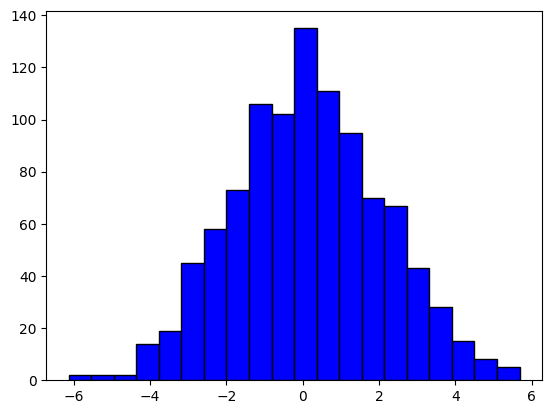

In [4]:
plt.hist([random.normalvariate(0, 2) for _ in range(1000)], bins=20, color='blue', edgecolor='black')

In [46]:
import requests
import pandas as pd

def download_alpha_vantage_data_to_csv(api_key, stock_symbol, outputsize, filename):
    base_url = 'https://www.alphavantage.co/query'
    
    params = {
        'function': 'TIME_SERIES_DAILY',
        'symbol': stock_symbol,
        'apikey': api_key,
        'outputsize': outputsize,
    }

    try:
        response = requests.get(base_url, params=params)
        data = response.json()

        if 'Time Series (Daily)' in data:
            time_series = data['Time Series (Daily)']
            stock_data = pd.DataFrame.from_dict(time_series, orient='index')
            stock_data.reset_index(inplace=True)
            column_renames = {
                'index': 'Date',
                '1. open': 'Open',
                '2. high': 'High',
                '3. low': 'Low',
                '4. close': 'Close',
                '5. volume': 'Volume',
            }
            stock_data.rename(columns=column_renames, inplace=True)
            
            stock_data.to_csv(filename, index=False)
            print(f'Stock data downloaded and saved to {filename}')
        else:
            print('Data retrieval failed:', data)
    except Exception as e:
        print('Error:', e)

# Example usage
api_key = 'ZIV2UGRR961UY4W9'
for ticker in ['VOO', 'SCHD', 'SCHG', 'SCHX']:
    filename = f'{ticker}_alpha_vantage_data.csv'
    download_alpha_vantage_data_to_csv(api_key, ticker, 'full', filename)


Stock data downloaded and saved to VOO_alpha_vantage_data.csv
Stock data downloaded and saved to SCHD_alpha_vantage_data.csv
Stock data downloaded and saved to SCHG_alpha_vantage_data.csv
Stock data downloaded and saved to SCHX_alpha_vantage_data.csv


In [66]:
import pandas as pd
import decimal


# Load historical price data into a DataFrame
def load_data(file_path):
    data = pd.read_csv(file_path, parse_dates=['Date'])
    return data


# Calculate percentage change over different time periods
def calculate_percentage_change(data, time_period):
    return data['Close'].pct_change(periods=time_period) * 100

def calculate_likelihood(percent_changes, observed_change):
    return stats.norm(loc=np.mean(percent_changes), scale=np.std(percent_changes)).pdf(observed_change)


# Main function

tickers_and_files = [
    ('VOO', 'VOO_alpha_vantage_data.csv'),
    ('SCHD', 'SCHD_alpha_vantage_data.csv'),
    ('SCHG', 'SCHG_alpha_vantage_data.csv'),
    ('SCHX', 'SCHX_alpha_vantage_data.csv'),
]

time_periods = [1, 7, 30, 90, 180, 365, 3 * 365, 5 * 365, 10 * 365]  # Time periods in days
time_periods = [1]
days = range(-30, 0, 1)

multiplier = 0.1
money = decimal.Decimal(10_000.00)

for ticker, file in tickers_and_files:
    stock_data = load_data(file)

    print(f"Stock: {ticker}")
    for day in days:
        for period in time_periods:
            percentage_changes = calculate_percentage_change(stock_data, period)
            last_change = percentage_changes.iloc[day]  # Get the latest percentage change
            likelihood = calculate_likelihood(percentage_changes, last_change)
            investment_percentage = decimal.Decimal(min(likelihood * 100 * multiplier, 50))
            investment = money * (investment_percentage / 100)
            

            # f"Change: {last_change}\t{period}-day period likelihood: {likelihood:.4f}\tInvestment Percentage: {investment_percentage:.2f}%"
            print(f'Day {stock_data.iloc[day]["Date"]}')
            print(f"Change: {last_change}\tlikelihood: {likelihood:.4f}\tInvestment Percentage: {investment_percentage:.2f}%")
            if last_change < 0:
                print(f'Money before: {money:,.2f}\t Investment: {investment:,.2f}\t Money after: {money - investment:,.2f}')
                money -= investment
            else:
                print('No investment')
    print("=" * 40)





Stock: VOO
Day 2010-10-20 00:00:00
Change: -0.1482579688658281	likelihood: 0.2819	Investment Percentage: 2.82%
Money before: 10,000.00	 Investment: 281.89	 Money after: 9,718.11
Day 2010-10-19 00:00:00
Change: -1.0577208611729838	likelihood: 0.2192	Investment Percentage: 2.19%
Money before: 9,718.11	 Investment: 213.05	 Money after: 9,505.06
Day 2010-10-18 00:00:00
Change: 1.6130151697333117	likelihood: 0.1410	Investment Percentage: 1.41%
No investment
Day 2010-10-15 00:00:00
Change: -0.7199556950341579	likelihood: 0.2526	Investment Percentage: 2.53%
Money before: 9,505.06	 Investment: 240.12	 Money after: 9,264.94
Day 2010-10-14 00:00:00
Change: -0.18594272963927683	likelihood: 0.2813	Investment Percentage: 2.81%
Money before: 9,264.94	 Investment: 260.60	 Money after: 9,004.33
Day 2010-10-13 00:00:00
Change: 0.37257824143070994	likelihood: 0.2701	Investment Percentage: 2.70%
No investment
Day 2010-10-12 00:00:00
Change: -0.5939123979213035	likelihood: 0.2625	Investment Percentage: 2.

In [59]:
list(range(-30, 0, 1))

[-30,
 -29,
 -28,
 -27,
 -26,
 -25,
 -24,
 -23,
 -22,
 -21,
 -20,
 -19,
 -18,
 -17,
 -16,
 -15,
 -14,
 -13,
 -12,
 -11,
 -10,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1]